In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

## EDA (Exploratory Data Analysis)

In [ ]:
# Se cargan los datasets creados

df=pd.read_csv("../datasets/df.csv")
df_day=pd.read_csv("../datasets/df_day.csv")

Se valida que día es el más idóneo para invertir observando a que precio cierra el precio de las compañias agrupadas por sectores.

In [83]:
df_day

,sym,name,sector,0,1,2,3,4
0,MMM,3M,Industrials,87.447815,87.711394,87.514279,87.637020,87.559639
1,AOS,A. O. Smith,Industrials,21.533563,21.722292,21.596988,21.641366,21.612569
2,ABT,Abbott,Health Care,37.045023,37.258749,37.109513,37.221452,37.127603
3,ABBV,AbbVie,Health Care,69.386442,69.998203,69.931865,69.967578,70.018031
4,ACN,Accenture,Information Technology,87.398437,88.368002,87.877806,88.104606,87.828932
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,41.909495,42.217456,42.048674,42.164227,42.122698
499,ZBRA,Zebra Technologies,Information Technology,99.819330,100.691150,100.110990,100.233740,99.726649
500,ZBH,Zimmer Biomet,Health Care,79.622608,80.152811,79.876790,80.063896,79.892074
501,ZION,Zions Bancorporation,Financials,35.506400,35.649186,35.628951,35.683860,35.750112


In [84]:
# Se modifica el nombre de las columnas

df_day.columns=['sym','name','sector','lunes','martes','miercoles','jueves','viernes']

In [85]:
# Se agrupa por sector
df_day.groupby(df_day['sector'])[df_day.columns].mean()

,lunes,martes,miercoles,jueves,viernes
sector,,,,,
Communication Services,50.743653,50.953955,50.775517,50.891826,50.717519
Consumer Discretionary,112.008030,113.043683,112.475725,112.672223,112.471914
Consumer Staples,45.900629,46.210353,46.029720,46.086388,46.036795
Energy,38.811262,39.103320,39.000121,39.021472,39.073267
Financials,64.020121,64.397962,64.196532,64.311795,64.271107
Health Care,78.292516,78.917763,78.602415,78.774725,78.617358
Industrials,61.508708,62.000621,61.720063,61.813335,61.791934
Information Technology,65.670018,66.293690,66.022388,66.109117,65.888221
Materials,49.766189,50.151800,49.983026,50.039106,49.990278


Para la mayoria de los sectores las compañias alcanzan su precio máximo los martes. 

In [86]:
# Se valida el otro dataset (df)
df

,sym,name,years_in,sector,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,MMM,3M,66,Industrials,25.200357,31.196935,34.838571,40.182976,48.675238,47.161429,...,109.134167,122.420238,135.597024,169.364542,178.208207,156.188056,143.989012,174.957540,134.120837,120.1905
1,AOS,A. O. Smith,6,Industrials,1.965556,2.016935,3.157500,3.656746,3.558770,3.719683,...,21.640913,30.359563,38.260437,49.987331,53.185378,45.092579,45.607708,66.996429,60.582351,60.3715
2,ABT,Abbott,66,Health Care,11.124127,13.576694,12.654167,11.671706,12.824444,14.371508,...,34.765238,40.130635,35.929127,44.160677,59.562749,75.982063,92.162806,118.276548,110.497968,111.6425
3,ABBV,AbbVie,11,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,...,38.721032,44.695397,45.319563,58.355259,78.153386,65.653690,81.035929,105.845714,145.062829,153.0580
4,ACN,Accenture,12,Information Technology,NaN,13.048468,14.747024,14.160714,18.274484,18.302857,...,69.978016,85.882976,101.475238,118.477729,149.153267,172.536310,205.397668,302.624008,297.484582,275.4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,26,Consumer Discretionary,3.891944,5.445242,7.148532,7.265516,10.045516,12.807222,...,45.303333,50.010000,52.895119,65.430398,77.742191,97.441270,88.743953,116.094444,117.447251,128.1310
499,ZBRA,Zebra Technologies,4,Information Technology,22.327103,20.321048,24.501230,33.005595,52.081627,44.097341,...,71.196667,89.878492,64.032024,99.310319,150.661315,206.708492,266.642490,518.283373,343.300319,293.8120
500,ZBH,Zimmer Biomet,22,Health Care,NaN,25.814206,31.689405,44.838016,69.312460,67.371230,...,91.949286,99.426548,104.779683,110.212869,110.084781,121.348571,127.133320,146.745794,115.600558,125.0985
501,ZION,Zions Bancorporation,22,Financials,33.280278,37.724395,35.043730,37.528333,44.998690,53.290357,...,24.547381,24.094008,24.514167,38.088566,45.483944,41.532024,32.804269,54.069325,56.120279,50.7540


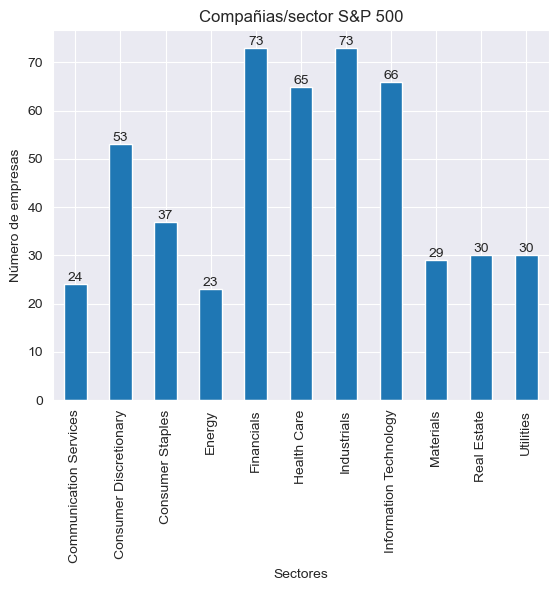

In [67]:
# Se grafica la cantidad de compañias por sector


# Tema para los graficos
sns.set_style("darkgrid")

empresas_por_sector = df.groupby('sector')['sym'].nunique()
empresas_por_sector.plot(kind='bar')

# Etiquetas de barras
for i, v in enumerate(empresas_por_sector.values):
    plt.text(i, v, str(v), ha='center', va='bottom')


plt.title('Compañias/sector S&P 500')
plt.xlabel('Sectores')
plt.ylabel('Número de empresas')
plt.show()

Se emplea la variable 'years_in' para determinar el tiempo que las compañias han estado en S&P 500.

In [60]:
# Top 10 compañias con mayor tiempo en S&P 500

df1=df.iloc[:, [1, 3, 2]]

df1=df1.sort_values(by=df1.columns[2], ascending=False).head(10).reset_index(drop=True)
df1

,name,sector,years_in
0,Texas Instruments,Information Technology,70
1,Whirlpool Corporation,Consumer Discretionary,69
2,3M,Industrials,66
3,John Deere,Industrials,66
4,Exelon,Utilities,66
5,S&P Global,Financials,66
6,Schlumberger,Energy,66
7,Entergy,Utilities,66
8,Sealed Air,Materials,66
9,Edison International,Utilities,66


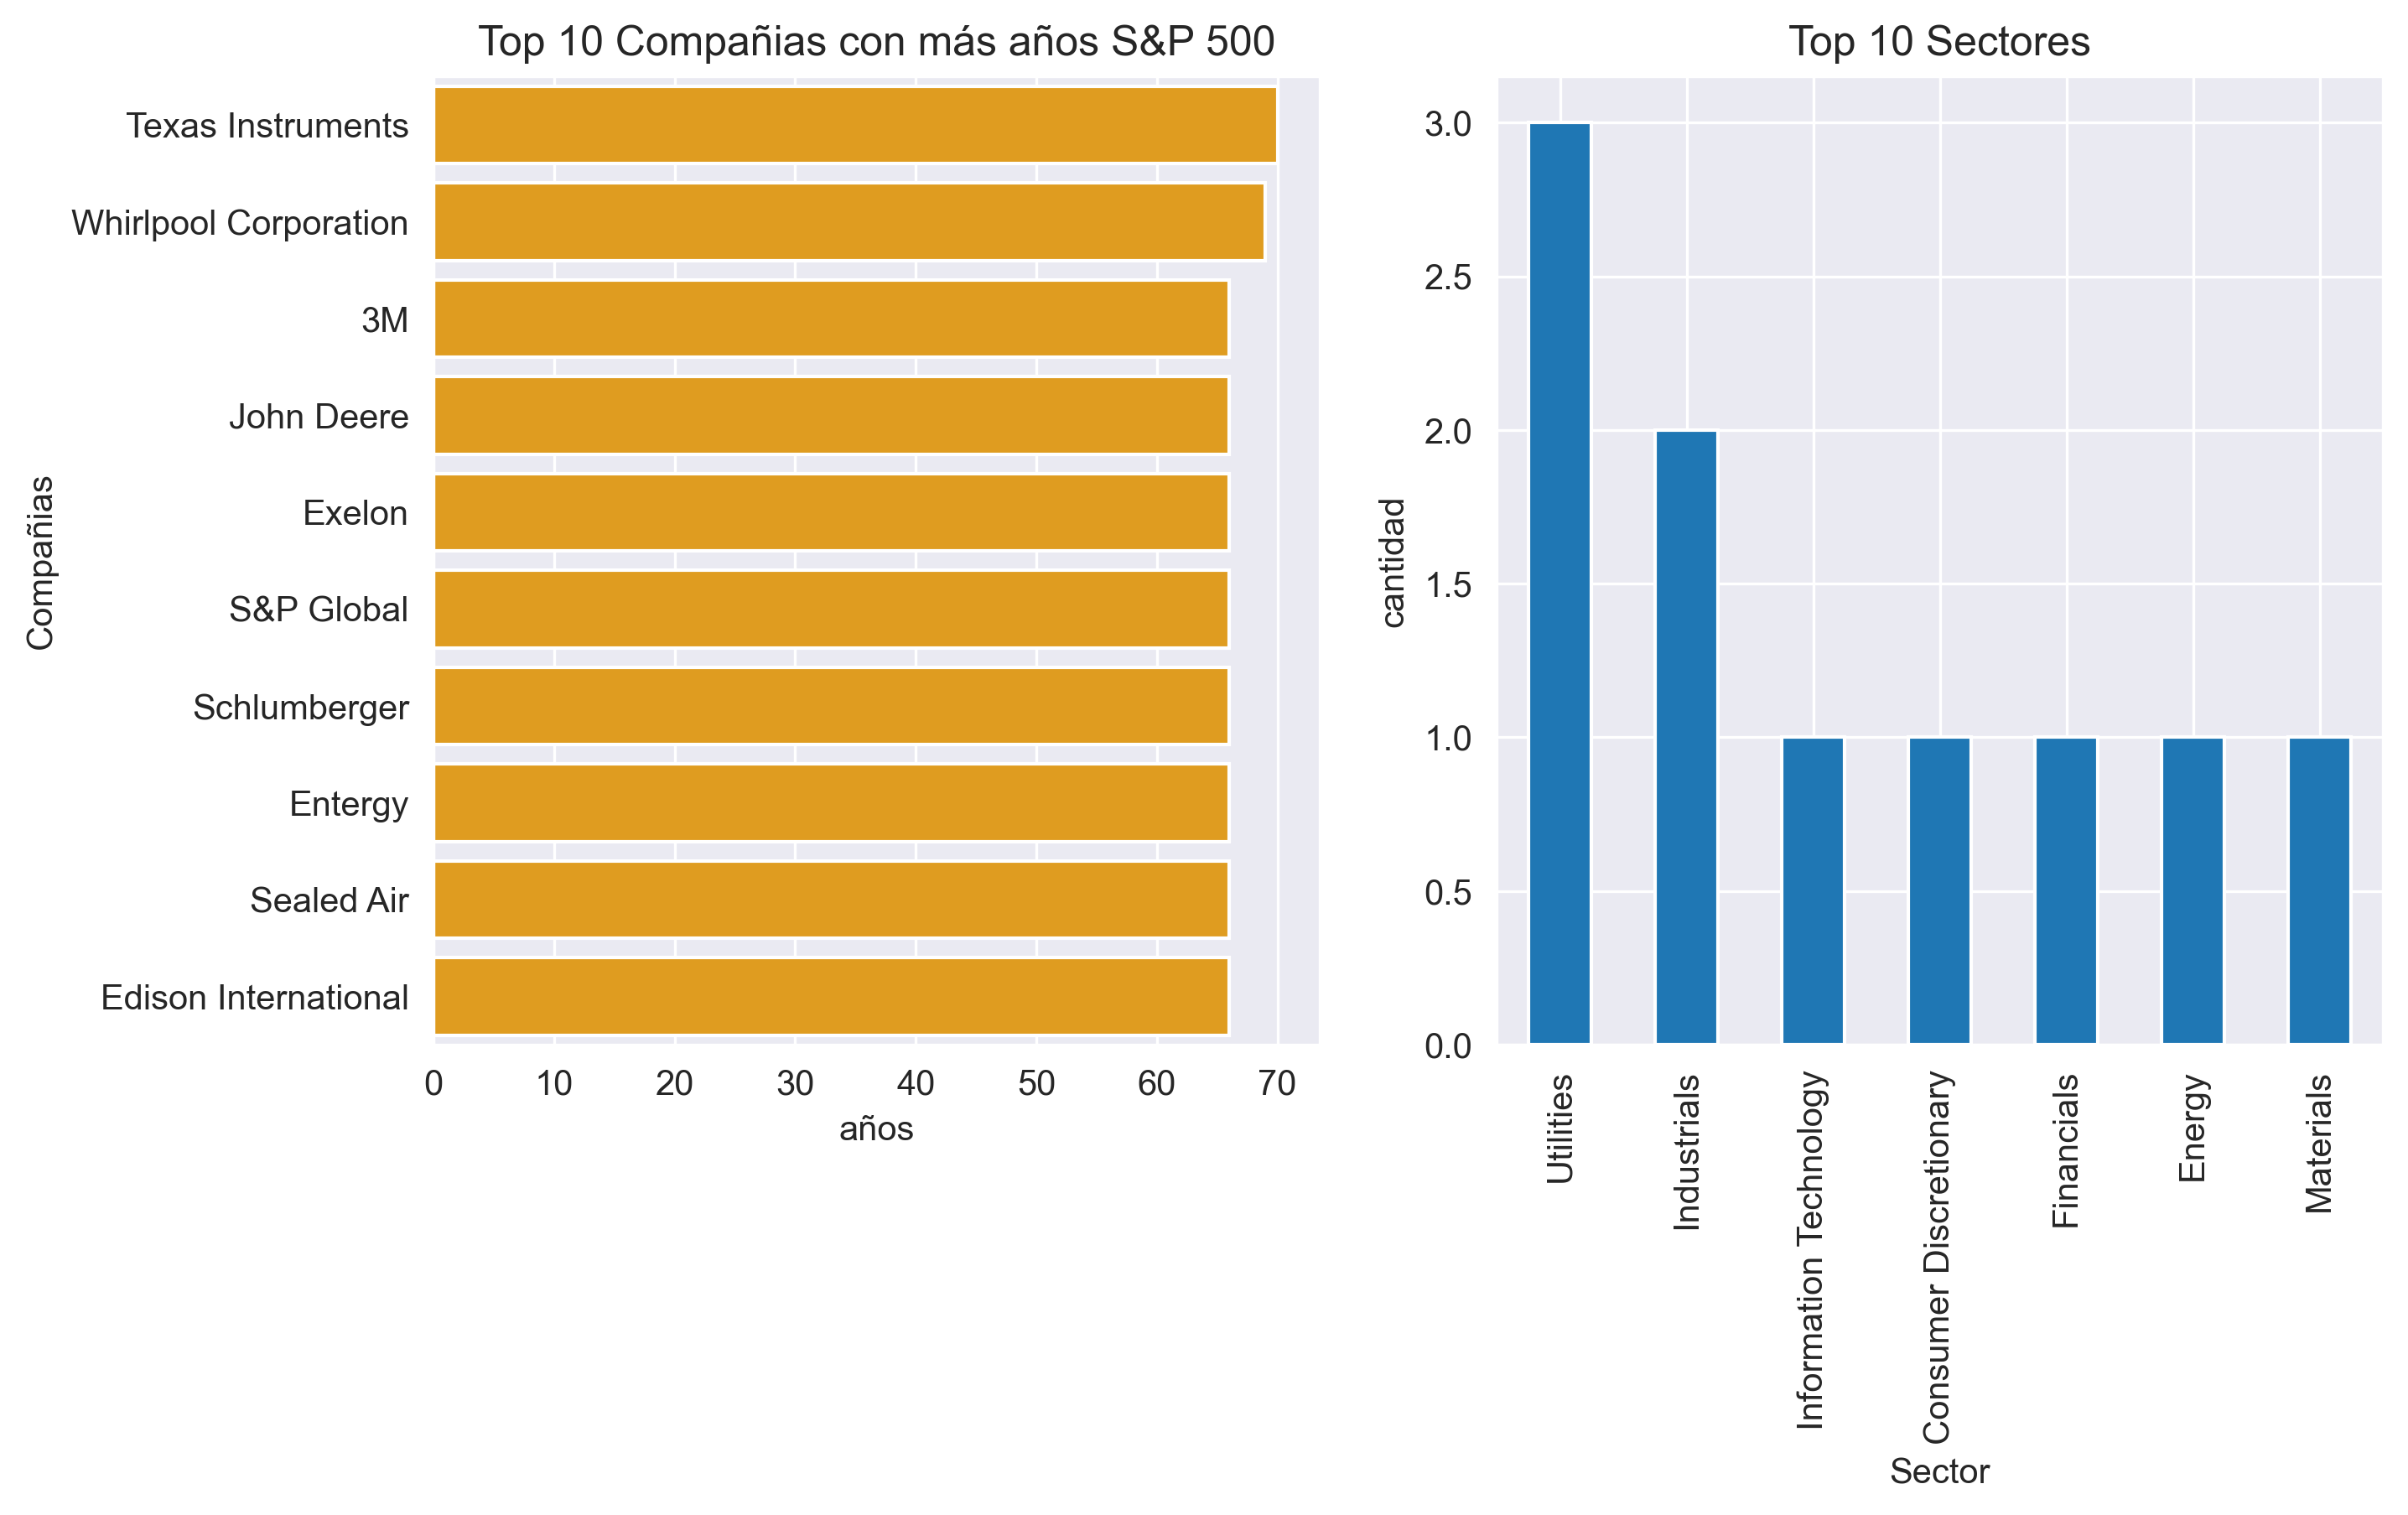

In [61]:
# Se crea subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5),dpi=300)

# Grafica de películas más vistas

sns.barplot(y='name', x='years_in', data=df1, color='orange', ax=ax[0])

# Etiquetas y título para la primera gráfica
ax[0].set_xlabel('años')
ax[0].set_ylabel('Compañias')
ax[0].set_title('Top 10 Compañias con más años S&P 500')

# Graficar la segunda gráfica en el subplot
df1['sector'].value_counts().plot.bar(ax=ax[1])

# Etiquetas y título para la segunda gráfica
ax[1].set_title('Top 10 Sectores')
ax[1].set_xlabel('Sector')
ax[1].set_ylabel('cantidad')

plt.show()

El presente dataframe (df) nos genera la variable 'Adj Close' por año, desde el 2000 hasta enero 2023. <br>
El 'Adj Close' representa el precio con que cierra el dia la compañia.<br>

Al calcular el valor porcentual de la variación que tiene el precio ('adj Close') podemos establecer la rentabilidad de la compañia. 



In [72]:
# RENTABILIDAD HISTORICA DEL AÑO 2000 AL 2023 (Top 10)

# Se toma las variables a analizar a travez de sus indices de columnas
df1_5 = df.iloc[:, [1, 3] + list(range(4, 28))]


df1_5 = df1_5.rename(columns={df.columns[27]: 'año_23'})

# Se calcula en una nueva variable el 'pct_change' que representa a el promedio de 
df1_5['pct_change'] = df1_5.iloc[:, [4,25]].pct_change(axis='columns')['año_23'] 

# Se ordena el dataframe descendentemente en 'pct_change'
df1_5=df1_5.sort_values(by='pct_change', ascending=False).head(10).reset_index(drop=True)

df1_5

,name,sector,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,año_23,pct_change
0,Monster Beverage,Consumer Staples,0.046151,0.037339,0.040476,0.054683,0.218016,0.877897,2.747171,3.652311,...,22.731190,23.831865,25.847490,28.834781,29.585992,36.626087,45.867738,45.006574,50.8600,1255.541176
1,Apple Inc.,Information Technology,0.694762,0.307379,0.290992,0.281944,0.539762,1.418532,2.152590,3.898964,...,27.208095,24.201032,35.488367,45.243068,50.625079,93.773320,139.587579,154.146494,135.5710,464.892431
2,Netflix,Communication Services,NaN,NaN,0.850065,2.081111,3.413333,2.597381,3.690677,3.123665,...,91.895675,102.030357,165.374263,319.290319,328.872381,446.827233,558.217698,284.639243,334.7590,392.804033
3,Old Dominion,Industrials,0.896944,0.930363,1.445198,3.423214,5.164484,6.344087,8.564980,8.026932,...,45.126706,44.585040,64.731434,94.255299,104.228095,166.545731,270.348214,282.512271,311.5660,214.587007
4,Intuitive Surgical,Health Care,2.697737,1.855927,1.823968,1.563651,2.490040,7.081190,11.884104,20.605976,...,56.335317,70.699841,102.394781,159.902709,177.337698,209.133913,303.697103,246.075299,257.8785,140.383217
5,SBA Communications,Real Estate,39.536786,20.994556,2.450952,2.463016,5.418889,12.427143,23.418805,31.148088,...,111.673611,100.933968,131.595378,157.610797,213.518770,283.083360,311.199048,313.392231,292.5655,118.368088
6,Booking Holdings,Consumer Discretionary,226.390952,28.396008,19.576190,20.647421,22.952460,22.885595,30.570637,71.705657,...,1219.880952,1346.712698,1798.154542,1968.888685,1871.153889,1741.466126,2292.723849,2059.392988,2296.5345,116.312636
7,Amazon,Consumer Discretionary,2.326706,0.610081,0.824524,1.887024,2.178413,1.995278,1.795418,3.361195,...,23.906905,34.976111,48.408287,82.086215,89.459484,134.042332,167.193413,126.098845,94.2235,113.276263
8,Nvidia,Information Technology,2.013889,3.023669,2.205437,1.353651,1.483294,2.182540,4.151474,6.360080,...,5.746746,13.210992,37.007012,57.565100,43.410119,98.650672,194.943175,185.545060,172.7040,77.308307
9,American Tower,Real Estate,33.045992,16.113145,2.907262,6.822341,11.557738,17.190437,26.988964,33.227092,...,82.034881,92.419524,115.935378,132.505578,188.845476,228.078814,249.921270,235.891235,221.6230,75.230834


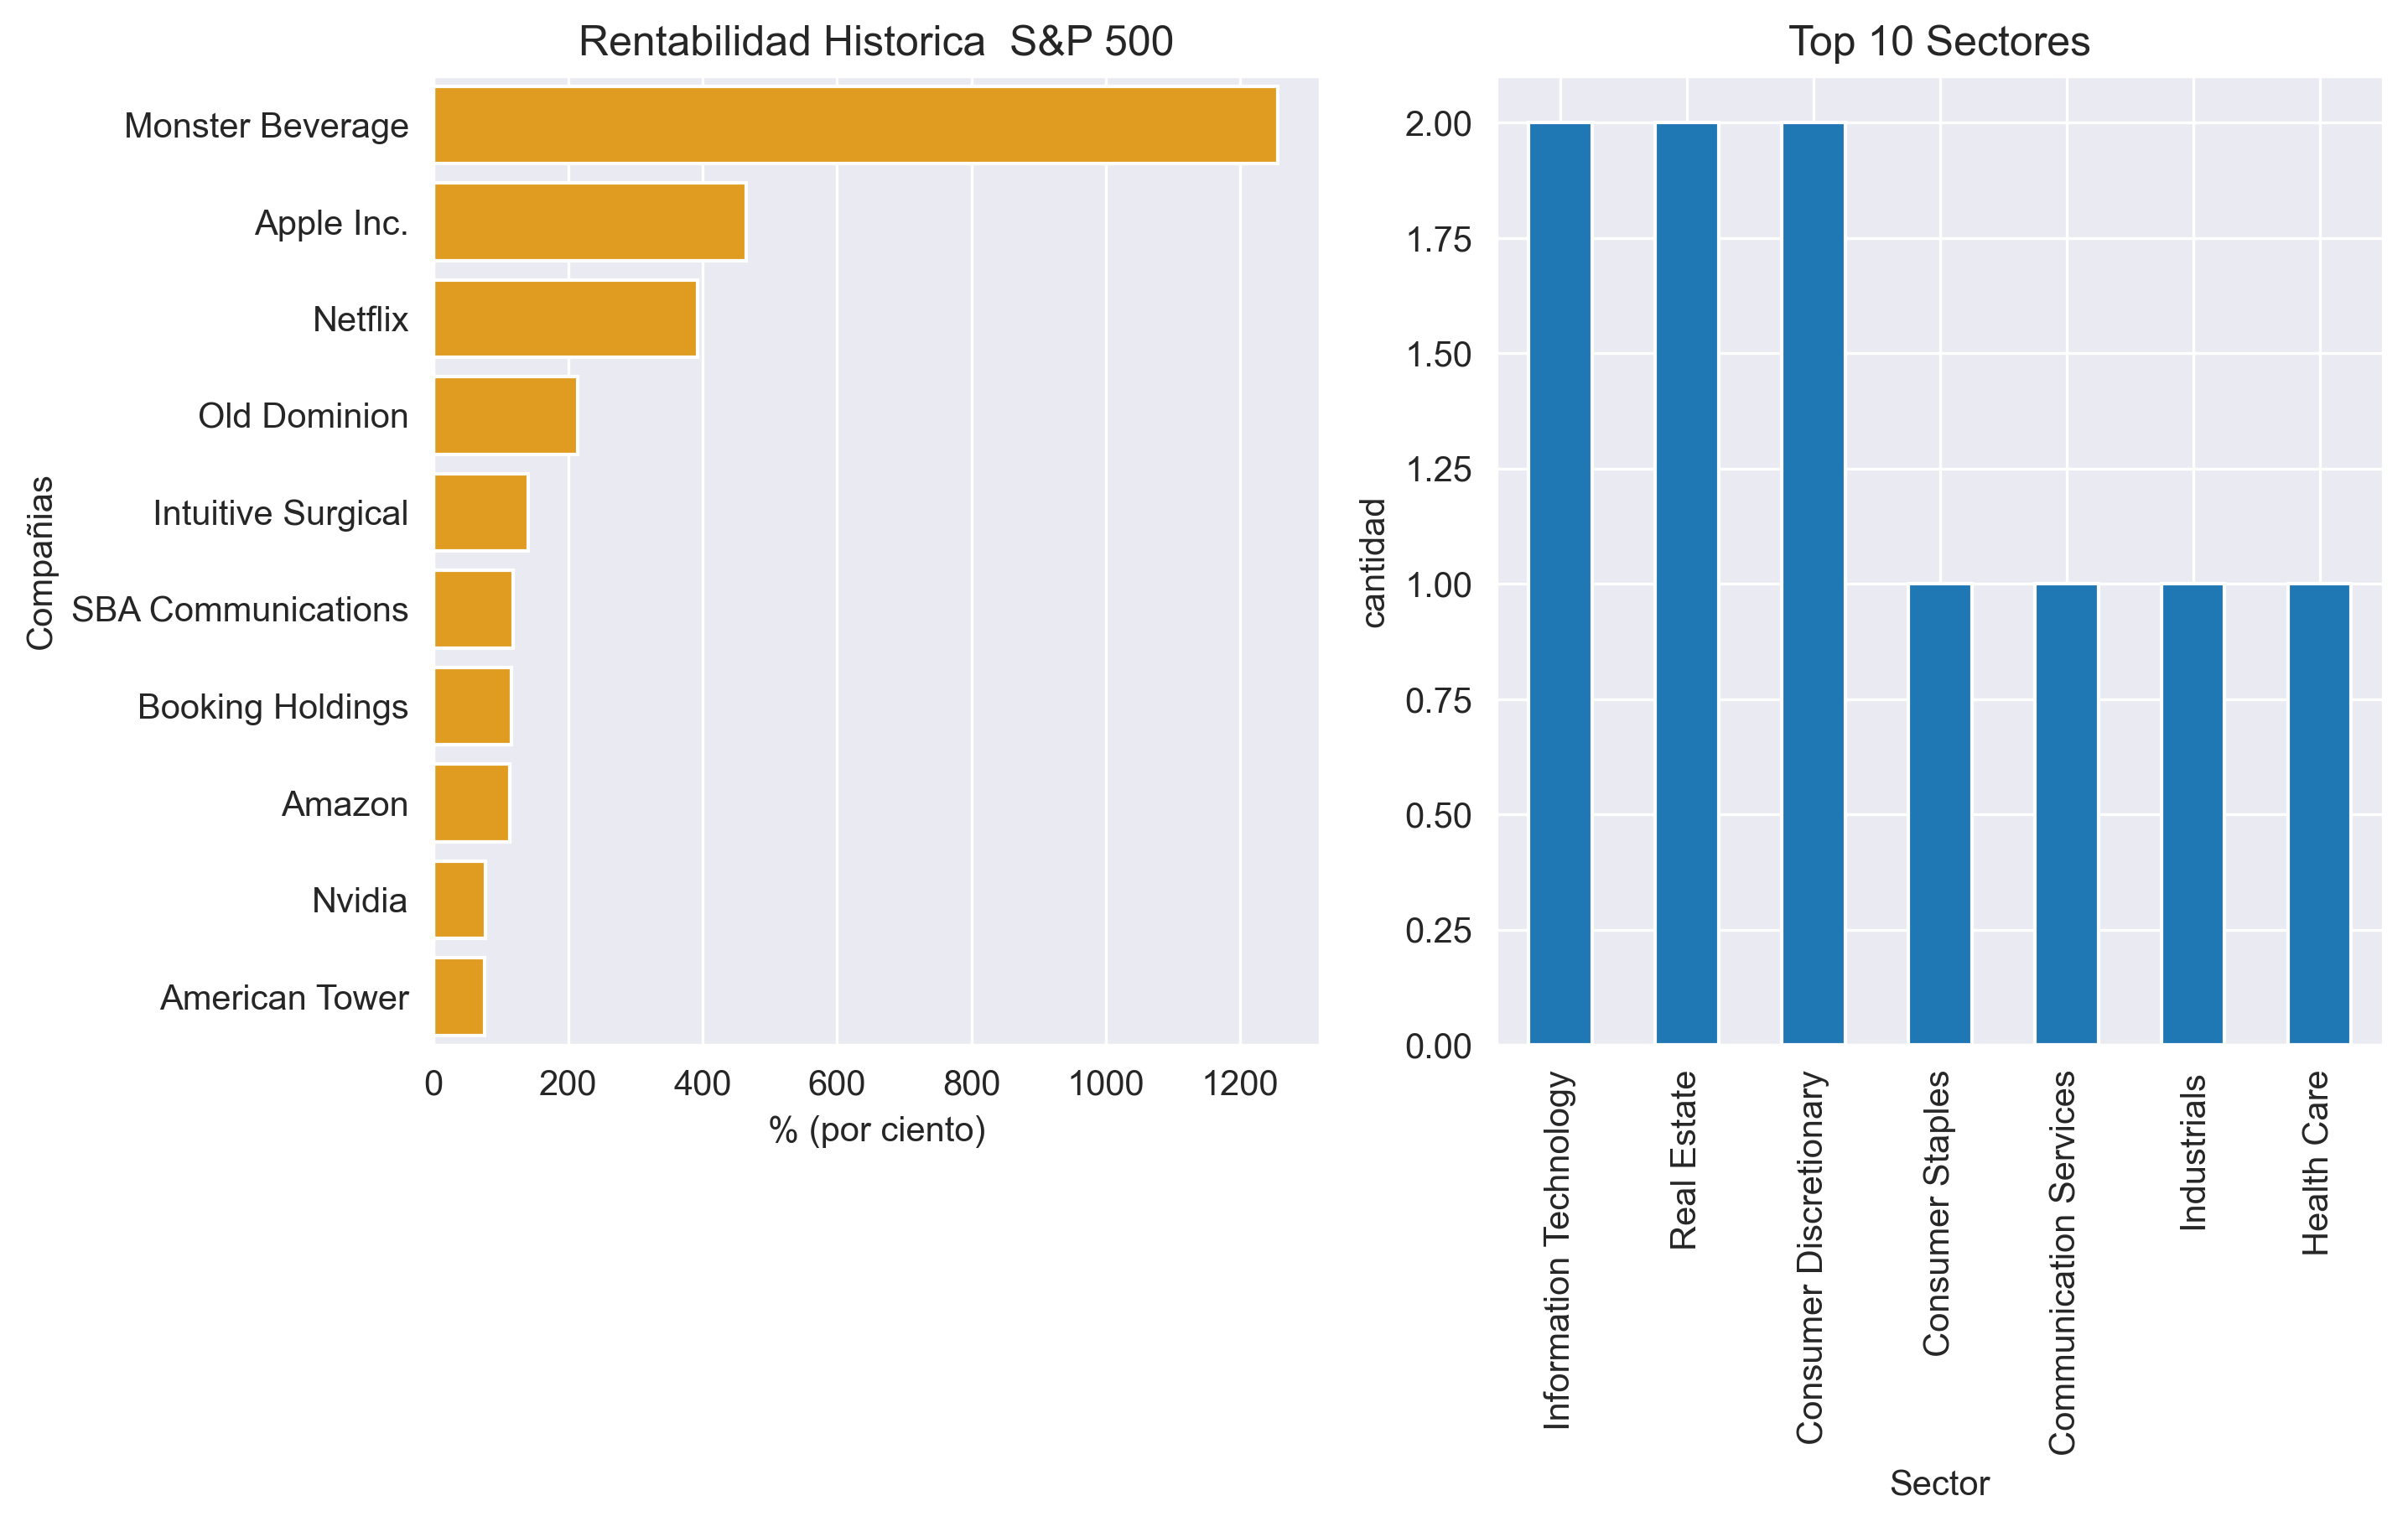

In [76]:
# Se crea subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5),dpi=300)

# Grafica 

sns.barplot(y='name', x='pct_change', data=df1_5, color='orange', ax=ax[0])

# Etiquetas y título para la primera gráfica
ax[0].set_xlabel('% (por ciento)')
ax[0].set_ylabel('Compañias')
ax[0].set_title('Rentabilidad Historica  S&P 500')

# Graficar la segunda gráfica en el subplot
df1_5['sector'].value_counts().plot.bar(ax=ax[1])

# Etiquetas y título para la segunda gráfica
ax[1].set_title('Top 10 Sectores')
ax[1].set_xlabel('Sector')
ax[1].set_ylabel('cantidad')

plt.show()

In [79]:
# RENTABILIDAD ULTIMOS 5 AÑOS (Top 10)

df2=df.iloc[:, [1, 3, 22,23,24,25,26, 27]] # Se toma el rango de años para el analisis
df2.columns=['name','sector','año_18','año_19','año_20','año_21', 'año_22', 'año_23'] 

# Se calcula el cambio porcentual por año del valor de las acciones en la columna 'pct_change'
df2['pct_change'] = df2.iloc[:, [2,3,4,5,6,7]].pct_change(axis='columns')['año_23'] 

# Se ordena el dataframe descendentemente en 'pct_change'
df2=df2.sort_values(by='pct_change', ascending=False).head(10).reset_index(drop=True)

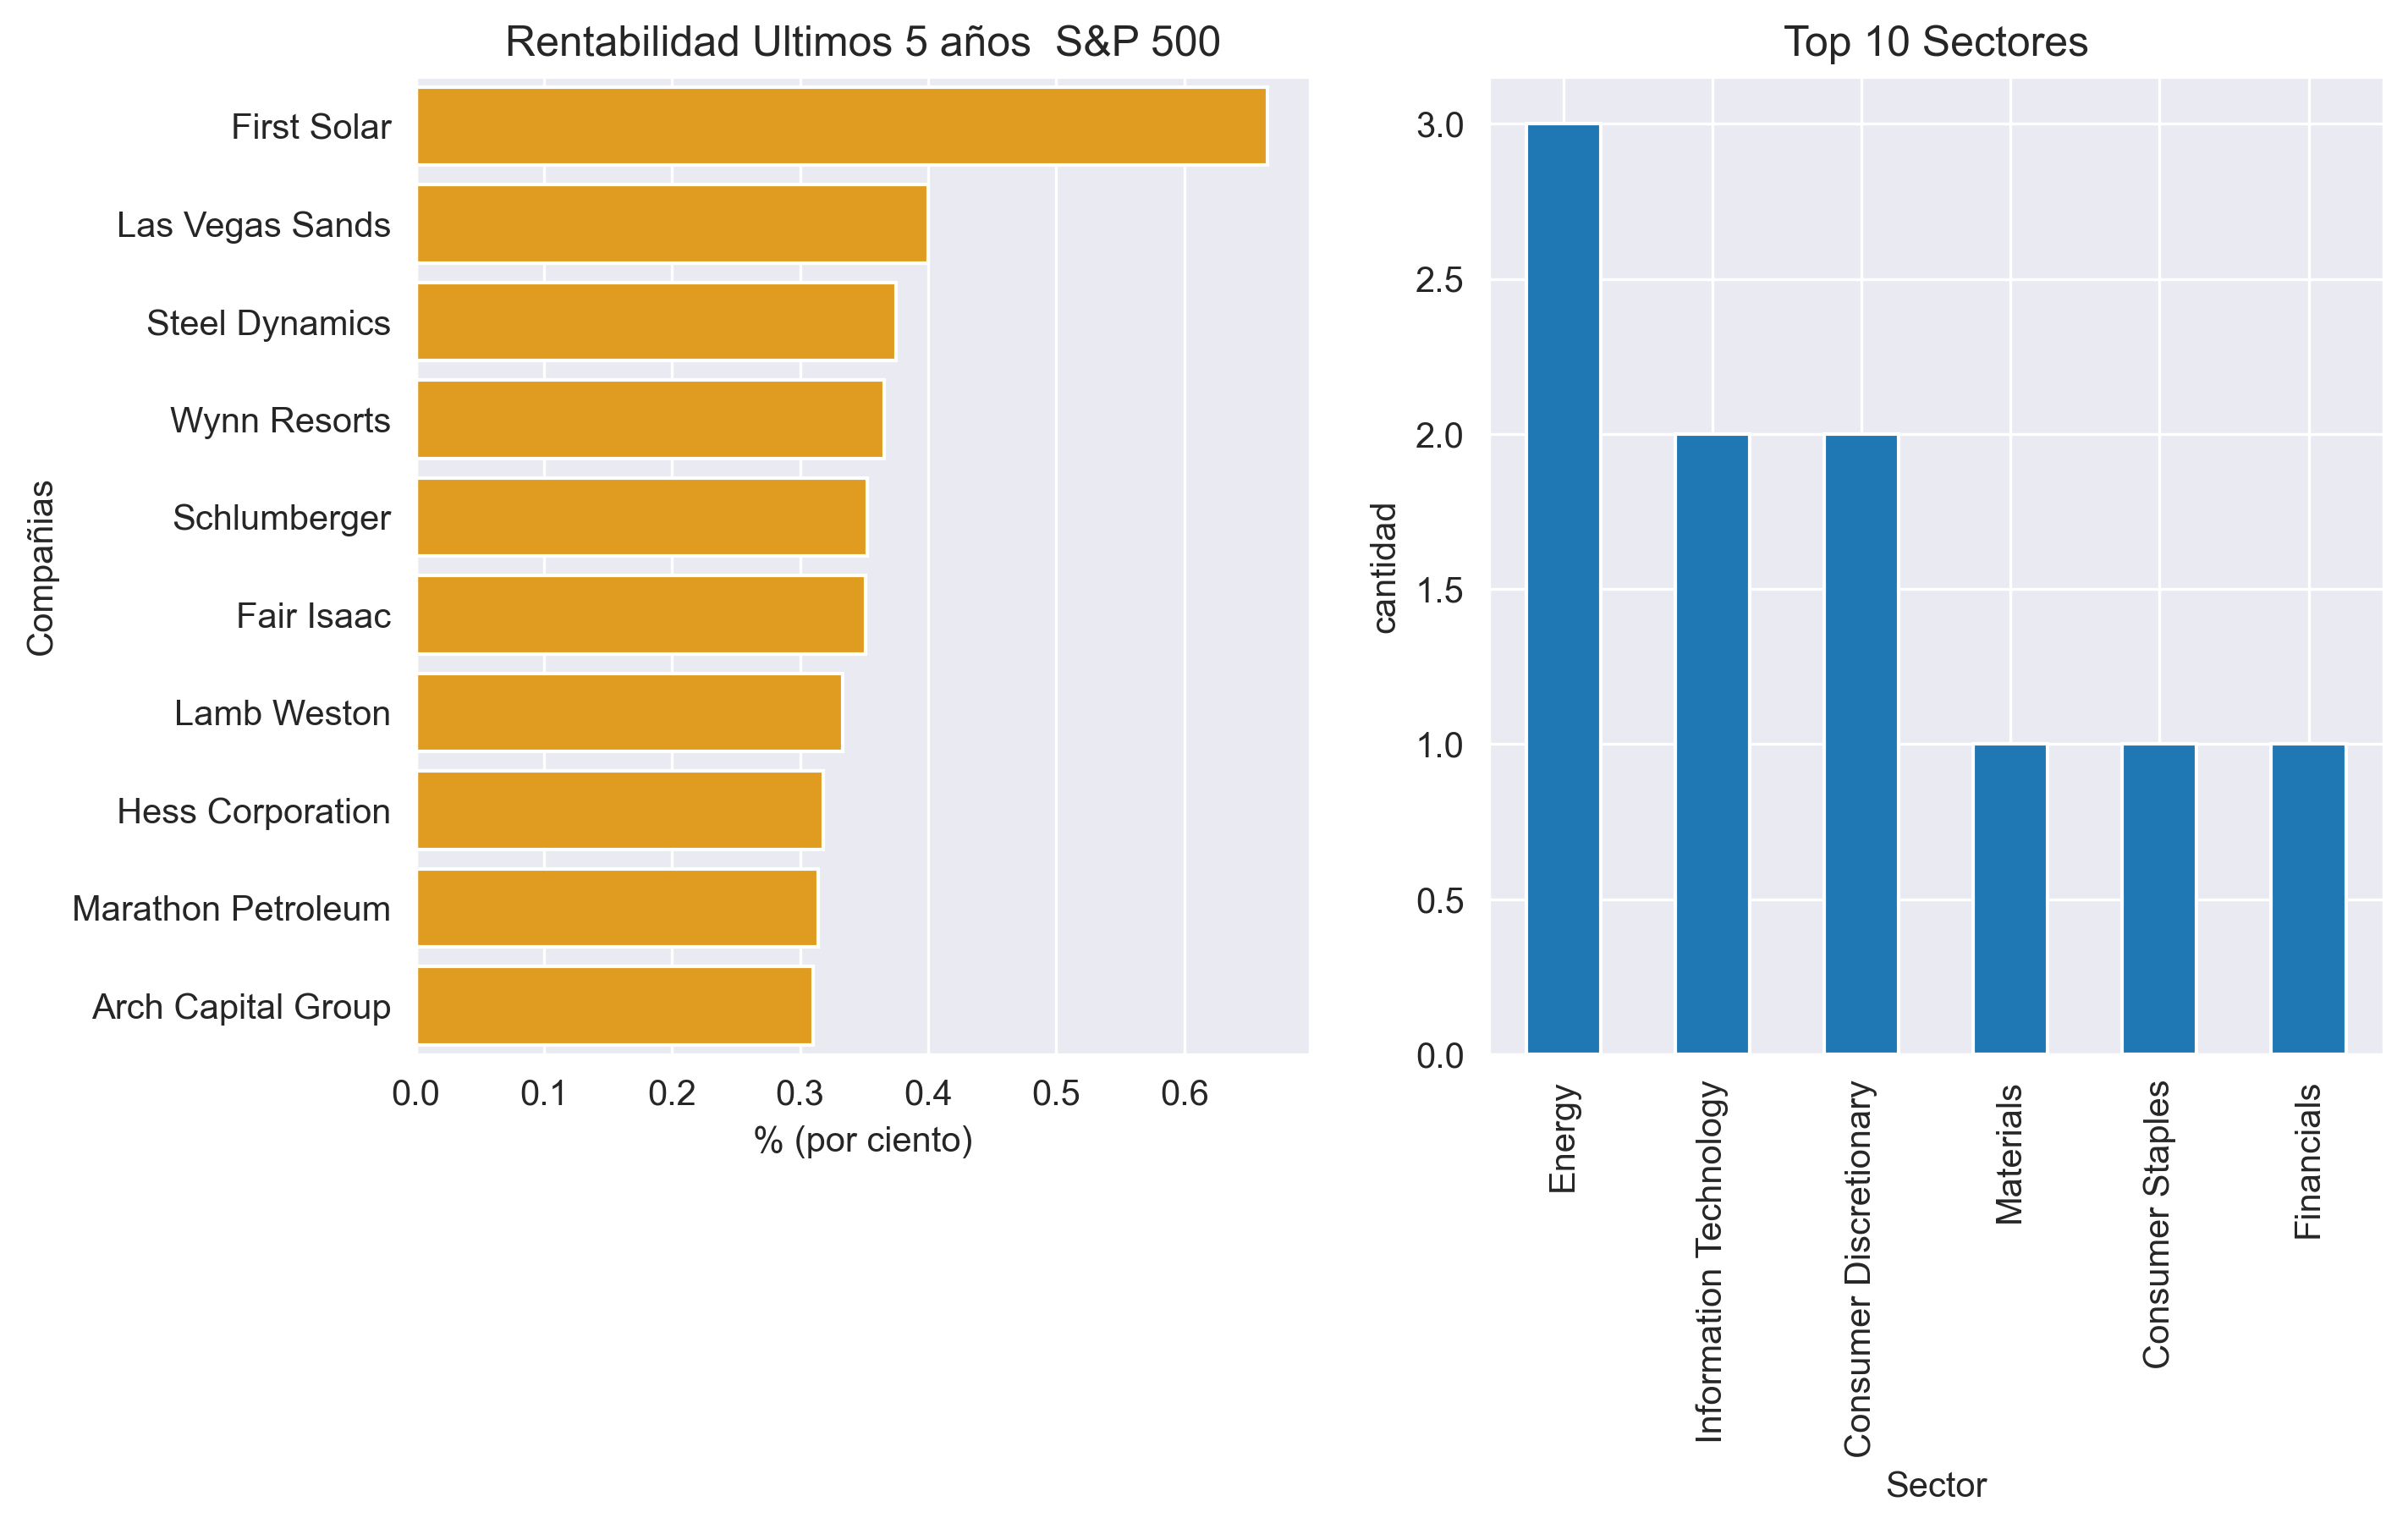

In [81]:
# Se crea subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5),dpi=300)

# Grafica 

sns.barplot(y='name', x='pct_change', data=df2, color='orange', ax=ax[0])

# Etiquetas y título para la primera gráfica
ax[0].set_xlabel('% (por ciento)')
ax[0].set_ylabel('Compañias')
ax[0].set_title('Rentabilidad Ultimos 5 años  S&P 500')

# Graficar la segunda gráfica en el subplot
df2['sector'].value_counts().plot.bar(ax=ax[1])

# Etiquetas y título para la segunda gráfica
ax[1].set_title('Top 10 Sectores')
ax[1].set_xlabel('Sector')
ax[1].set_ylabel('cantidad')

plt.show()